<a href="https://colab.research.google.com/github/VaishnaviKrishnaHari/CodewayProjects/blob/main/CWAY_SPAM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
spam = pd.read_csv("spam.csv",encoding='latin1')

In [ ]:
spam.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
spam.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
spam.shape[0]

5572

In [ ]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

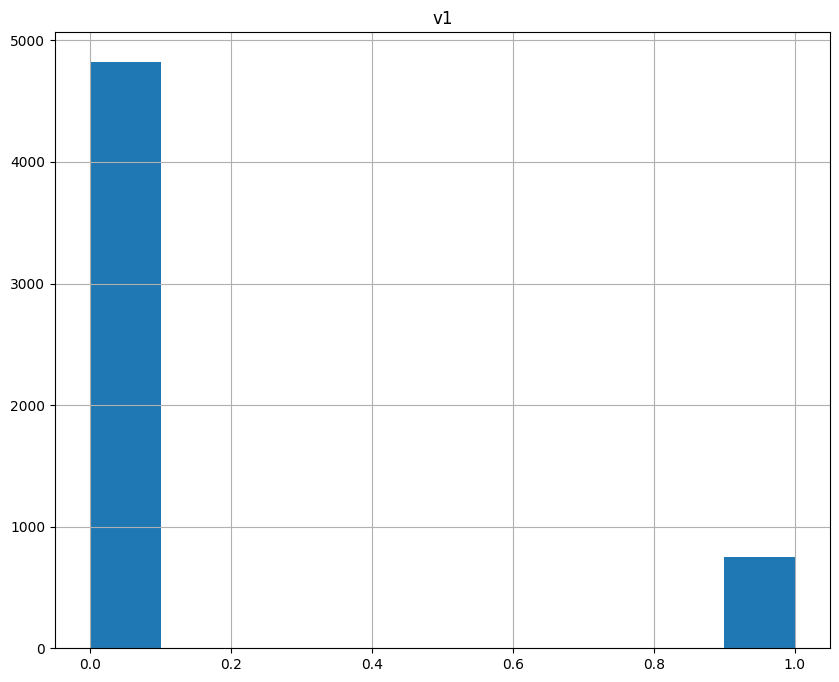

In [ ]:
spam.hist(figsize=(10, 8))
plt.show()

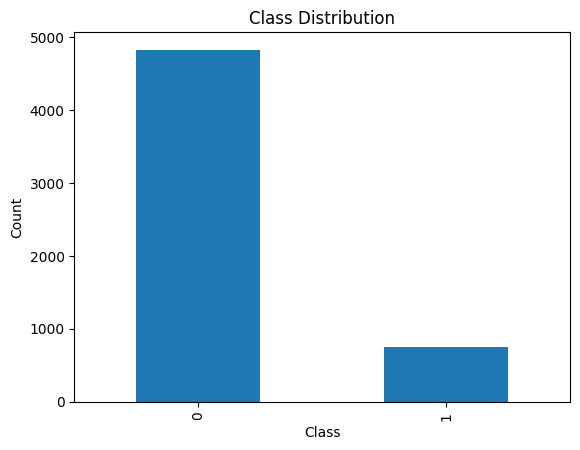

In [ ]:
spam['v1'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
spam['v2'] = spam['v2'].str.strip()

In [ ]:
spam['v1'] = spam['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spam['v2'], spam['v1'], test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression()
svm = SVC()

In [ ]:
naive_bayes.fit(X_train_tfidf, y_train)
logistic_regression.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", acc_score)

In [ ]:
print("Naive Bayes Classifier:")
evaluate_model(naive_bayes, X_test_tfidf, y_test)

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.9668161434977578


In [ ]:
print("\nLogistic Regression Classifier:")
evaluate_model(logistic_regression, X_test_tfidf, y_test)


Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9524663677130045


In [ ]:
print("\nSupport Vector Machine (SVM) Classifier:")
evaluate_model(svm, X_test_tfidf, y_test)


Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9766816143497757
